# Single FENE chain analysis
Here we will be only looking at a single chain and what tools are available to plot the dynamics.

In [1]:
import numpy as np
from dilutebrowniandynamics.simulate import simulate
from dilutebrowniandynamics.molecules.FENE_chain import FENEChain

## Parameters definition

In [2]:
n_links = 100       # Number of segments in the Kramers chain
L_max = 10         # Maximum elongation of each link: reminder: equilibirum length is 3.

output_file = 'outputs/sandpit'

## Initialise molecules
Here we just draw random vectors from a normal distribution and rescale to unit vectors. To do this with call `from_normal_distribution` constructor. 

In [3]:
# Starting vectors
molecule = FENEChain.from_normal_distribution(n_links, L_max, np.random.SeedSequence(2023))

We can plot this molecule using matplotlib 3d capabilities: firt we need to convert links to coordinates.

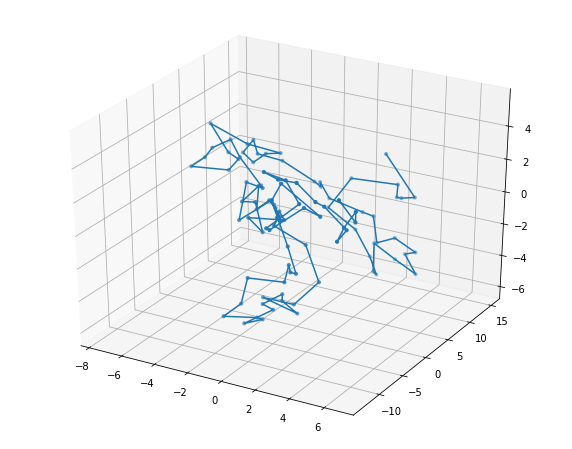

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xyz = molecule.coordinates
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
ax.plot(x, y, z)
ax.scatter(x, y, z, s=10)

Or we can export the molecule to vtk format which can be read by Paraview.

In [5]:
molecule.save_vtk('outputs/vtk/example.vtk')

## Initial relaxation
Thermalisation step.

In [6]:
gradU = np.zeros((3, 3))
dt = 0.01
n_steps = 100

observables, molecule_out = simulate(molecule, gradU, dt, n_steps,
                                     write_interval=1, full_trajectory=False, progress=True)

100%|██████████| 100/100 [00:01<00:00, 94.71it/s]


## Simulation
Now let's simulate a sudden uniaxial elongation followed by relaxation. We first define a callable `gradU` function for this scenario.

In [7]:
from scipy.interpolate import interp1d
t_base = [0, # Elongation starts at t = 0
          10] # Relaxation will start from t = 5
gradU_base = [np.diag([1, -.5, -.5]),
              np.zeros((3, 3))]
gradU = interp1d(t_base, gradU_base, axis=0, kind='previous', bounds_error=False, 
                 fill_value=(gradU_base[0], gradU_base[-1]), assume_sorted=True)

In [8]:
n_steps = 400
dt = 0.01
observables, trajectory = simulate(molecule_out, gradU, dt, n_steps,
                                     write_interval=1, full_trajectory=True, progress=True)

 49%|████▉     | 196/400 [00:00<00:00, 1954.98it/s]/home/etienne/Python/DiluteBrownianDynamics/dilutebrowniandynamics/molecules/FENE_chain.py:171: RuntimeWarning: divide by zero encountered in true_divide
  self.H = self.L_max**2/(self.L_max**2-Q2)


Switch to rigid, dt=0.000625
[1629.81951245]
[1592.11682628]
0 99.9371905388164 154.80321507225477
0 77 78
[73.91412976]
[1592.11682628]
[1939.11113724]
1 99.94842998006675 168.57253183494367
1 77 78
[83.80781192]
[1939.11113724]
[2466.33378663]
2 99.9594539877197 190.61887256988967
2 77 78
[94.33926445]
[2466.33378663]
[3339.41185037]
3 99.97005460707427 230.11229650188932
3 77 78
[99.84018353]
[3339.41185036]
[4976.25162581]
4 99.97990455316179 314.1843623555202
4 77 78
[70.0329043]
[4976.25162581]
[8686.91287993]
5 99.9884884306563 553.2171851838134
5 77 78
[191.31608978]
[8686.91287993]
[20199.29042203]
6 99.99504933104527 2813.608507136494
6 77 77
[2713.61345781]
[20199.29042203]
[83299.93911446]
7 99.99879951893047 62616.445811128746
7 77 77
[62516.44701161]
[83299.93911442]
[1164807.12881878]
8 99.99991414887708 13176483.946059667
8 77 77
[13176383.94614552]
[1164807.12890867]
[2.13123316e+08]
9 99.99999953078809 443556389342.1793
9 77 77
[4.43556389e+11]
[2.13123319e+08]
[7.097

[90212.3091414]
[405725.58194044]
25 99.99975352798923 94220.3662073828
25 77 77
[94120.36645385]
[405725.58192958]
[6825185.07166563]
26 99.99998534838265 28325345.29147795
26 77 77
[28325245.2914926]
[6825185.07138347]
[1.82629873e+09]
27 99.99999994524444 2035717498140.0486
27 77 77
[2.0357175e+12]
[1.82629855e+09]
[1.30289528e+14]
28 99.99999999999923 1.0364590358167562e+22
28 77 77
[1.03645904e+22]
[1.30312489e+14]
[6.63333783e+23]
29 100.0 inf
29 77 76
[inf]
[inf]
[inf]
30 100.0 inf
30 77 76
[inf]
[inf]
[inf]
31 100.0 inf
31 77 76
[inf]
[inf]
[inf]
32 100.0 inf
32 77 76
[inf]
[inf]
[inf]
33 100.0 inf
33 77 76
[inf]
[inf]
[inf]
34 100.0 inf
34 77 76
[inf]
[inf]
[inf]
35 100.0 inf
35 77 76
[inf]
[inf]
[inf]
36 100.0 inf
36 77 76
[inf]
[inf]
[inf]
37 100.0 inf
37 77 76
[inf]
[inf]
[inf]
38 100.0 inf
38 77 76
[inf]
[inf]
[inf]
39 100.0 inf
39 77 76
[inf]
[inf]
[inf]
40 100.0 inf
40 77 76
[inf]
[inf]
[inf]
41 100.0 inf
41 77 76
[inf]
[inf]
[inf]
42 100.0 inf
42 77 76
[inf]
[inf]
[inf]

[5.29636599]
[1399.79686175]
[1385.7225911]
15 99.92783548406989 99.16504978683281
15 77 78
[5.24285747]
[1385.7225911]
[1371.61775268]
16 99.92709339041113 99.1376763191878
16 77 78
[5.18921759]
[1371.61775268]
[1357.48616158]
17 99.92633442400361 99.11025473757877
17 77 78
[5.13546075]
[1357.48616158]
[1343.33166379]
18 99.92555822013642 99.08279252503671
18 77 78
[5.08160151]
[1343.3316638]
[1329.15813212]
19 99.9247644071961 99.0552972124426
19 77 78
[5.02765454]
[1329.15813212]
[1314.96946194]
20 99.92395260658573 99.02777637034414
20 77 78
[4.97363461]
[1314.96946194]
[1300.76956701]
21 99.92312243264574 99.02511904190641
21 77 79
[4.91955657]
[1300.76956701]
[1286.56237511]
22 99.92227349257648 99.02511904190641
22 77 79
[4.86543536]
[1286.56237511]
[1272.35182377]
23 99.92140538636292 99.02511904190641
23 77 79
[4.81128595]
[1272.35182377]
[1258.14185588]
24 99.92051770670165 99.02511904190641
24 77 79
[4.75712337]
[1258.14185588]
[1243.93641531]
25 99.91961003893014 99.0251190

[490.93220279]
[463.73701467]
23 99.78436053876231 99.67473520440025
23 79 78
[3.45993715]
[463.73701467]
[436.38575133]
24 99.77084494693891 99.56813360479467
24 79 78
[3.24988404]
[436.38575133]
[408.90645038]
25 99.75544528606223 99.46109044584936
25 79 78
[3.038619]
[408.90645038]
[381.32769095]
26 99.7377583575134 99.353717768073
26 79 78
[2.82635918]
[381.32769095]
[353.67846423]
27 99.71725731105096 99.24612897668688
27 79 78
[2.61332595]
[353.67846423]
[325.98803512]
28 99.69324027502046 99.13843829707885
28 79 78
[2.39974389]
[325.98803512]
[298.28579358]
29 99.66475104697228 99.03076019274302
29 79 78
[2.18583972]
[298.28579358]
[270.60109315]
30 99.63045234283123 98.9232087355607
30 79 78
[1.97184111]
[270.60109315]
[242.96307136]
31 99.58841481777891 98.81589690810506
31 79 78
[1.75797549]
[242.96307136]
[215.40044183]
32 99.53574839889022 98.7311378611894
32 79 76
[1.54446867]
[215.40044183]
[187.94123772]
33 99.46791879625732 98.7311378611894
33 79 76
[1.33154329]
[187.94

88 100.07971015528317 105.06179359574529
88 79 79
[4.98208344]
[-1254.54529156]
[-1260.68272031]
89 100.07932209935875 105.08597097973266
89 79 79
[5.00664888]
[-1260.68272031]
[-1266.59319432]
90 100.07895194798809 105.10926058469502
90 79 79
[5.03030864]
[-1266.59319432]
[-1272.28441003]
91 100.07859877808139 105.1316919944973
91 79 79
[5.05309322]
[-1272.28441003]
[-1277.76385572]
92 100.07826172226753 105.15329403999964
92 79 79
[5.07503232]
[-1277.76385572]
[-1283.03881305]
93 100.07793996485783 105.1740947992024
93 79 79
[5.09615483]
[-1283.03881305]
[-1288.11635881]
94 100.07763273815753 105.1941215993423
94 79 79
[5.11648886]
[-1288.11635881]
[-1293.00336719]
95 100.07733931909031 105.21340102074396
95 79 79
[5.1360617]
[-1293.00336719]
[-1297.7065122]
96 100.07705902610505 105.23195890225749
96 79 79
[5.15489988]
[-1297.7065122]
[-1302.23227043]
97 100.07679121633753 105.24982034810242
97 79 79
[5.17302913]
[-1302.23227043]
[-1306.58692405]
98 100.07653528300271 105.2670097359

[-2081.63372216]
96 100.0480391910139 104.13304910069269
96 79 79
[4.08500991]
[-2081.63372216]
[-2088.5341574]
97 100.04788047140406 104.14664072011075
97 79 79
[4.09876025]
[-2088.5341574]
[-2095.20976831]
98 100.04772791799294 104.15979136763762
98 79 79
[4.11206345]
[-2095.20976831]
[-2101.66743713]
99 100.04758126725154 104.17251441014453
99 79 79
[4.12493314]
Switch to rigid, dt=9.765625e-06
[1044.11999817]
[954.46696062]
0 99.89522947977704 99.24767886518906
0 79 77
[0.96317719]
[954.46696062]
[868.31268252]
1 99.88483411331704 99.24767886518906
1 79 77
[0.87942914]
[868.31268252]
[782.81949186]
2 99.87225662999006 99.24767886518906
2 79 77
[0.79628837]
[782.81949186]
[698.01725315]
3 99.85673706552602 99.24767886518906
3 79 77
[0.71378461]
[698.01725315]
[613.93444201]
4 99.83711615905969 99.24767886518906
4 79 77
[0.63194624]
[613.93444201]
[530.59795783]
5 99.81153338695664 99.26073338042968
5 79 79
[0.55080001]
[530.59795783]
[448.03282283]
6 99.77680206693596 99.30643139884

[-3163.88736055]
89 100.03160668778763 103.11124971762122
89 79 79
[3.07964303]
[-3163.88736055]
[-3177.64941876]
90 100.03146980261882 103.124758159186
90 79 79
[3.09328836]
[-3177.64941875]
[-3191.03096672]
91 100.03133783439986 103.1378951008036
91 79 79
[3.10655727]
[-3191.03096672]
[-3204.04163805]
92 100.03121058066556 103.15066982059572
92 79 79
[3.11945924]
[-3204.04163804]
[-3216.69087302]
93 100.03108784895647 103.16309141938143
93 79 79
[3.13200357]
[-3216.69087302]
[-3228.98791952]
94 100.03096945621736 103.1751688207274
94 79 79
[3.14419936]
[-3228.98791952]
[-3240.94183413]
95 100.03085522823861 103.18691077126222
95 79 79
[3.15605554]
[-3240.94183413]
[-3252.56148336]
96 100.03074499913731 103.19832584122126
96 79 79
[3.16758084]
[-3252.56148336]
[-3263.85554518]
97 100.03063861087473 103.20942242520847
97 79 79
[3.17878381]
[-3263.85554518]
[-3274.83251056]
98 100.03053591280695 103.22020874317344
98 79 79
[3.18967283]
[-3274.83251057]
[-3285.50068533]
99 100.0304367612

[-4762.1047337]
[-4785.9541735]
87 100.02089447503563 102.33831558729206
87 79 79
[2.31742111]
[-4785.95417351]
[-4809.23528876]
88 100.02079332658846 102.34971346134041
88 79 79
[2.32892013]
[-4809.23528876]
[-4831.96028249]
89 100.02069553434916 102.36084063472202
89 79 79
[2.3401451]
[-4831.96028249]
[-4854.14116214]
90 100.02060096660969 102.37170286208668
90 79 79
[2.3511019]
[-4854.14116214]
[-4875.78973929]
91 100.0205094980192 102.38230581001153
91 79 79
[2.36179631]
[-4875.78973929]
[-4896.91762955]
92 100.02042100920718 102.3926550564945
92 79 79
[2.37223405]
[-4896.91762956]
[-4917.53625271]
93 100.0203353864336 102.40275609055377
93 79 79
[2.3824207]
[-4917.53625271]
[-4937.65683299]
94 100.0202525212631 102.41261431197503
94 79 79
[2.39236179]
[-4937.65683299]
[-4957.29039965]
95 100.0201723102619 102.42223503116438
95 79 79
[2.40206272]
[-4957.29039965]
[-4976.44778758]
96 100.02009465471527 102.43162346911096
96 79 79
[2.41152881]
[-4976.44778758]
[-4995.13963821]
97 100

[-7036.91732674]
[-7076.74262676]
84 100.01413079509516 101.72137558143034
84 79 79
[1.70724479]
[-7076.74262677]
[-7115.7389269]
85 100.01405335426543 101.73089987907692
85 79 79
[1.71684652]
[-7115.7389269]
[-7153.92160678]
86 100.01397834719145 101.74022671846203
86 79 79
[1.72624837]
[-7153.92160678]
[-7191.30584252]
87 100.013905680302 101.74935971536672
87 79 79
[1.73545404]
[-7191.30584252]
[-7227.90660566]
88 100.01383526454558 101.75830244096652
88 79 79
[1.74446718]
[-7227.90660566]
[-7263.73866231]
89 100.01376701512112 101.76705842130855
89 79 79
[1.75329141]
[-7263.73866232]
[-7298.81657257]
90 100.01370085122782 101.77563113685794
90 79 79
[1.76193029]
[-7298.81657257]
[-7333.15469002]
91 100.01363669583243 101.78402402211943
91 79 79
[1.77038733]
[-7333.15469002]
[-7366.76716156]
92 100.01357447545264 101.79224046532
92 79 79
[1.77866599]
[-7366.76716157]
[-7399.66792733]
93 100.01351411995539 101.80028380814944
93 79 79
[1.78676969]
[-7399.66792733]
[-7431.8707208]
94 1

[-10083.05566618]
[-10150.22863329]
79 100.00985199482817 101.23073612090035
79 79 79
[1.22088413]
[-10150.2286333]
[-10216.16517319]
80 100.00978840869395 101.23877058002542
80 79 79
[1.22898217]
[-10216.16517318]
[-10280.88536488]
81 100.00972678873958 101.24665793355057
81 79 79
[1.23693114]
[-10280.88536487]
[-10344.40906519]
82 100.00966705776713 101.25440052565607
82 79 79
[1.24473347]
[-10344.40906519]
[-10406.75590686]
83 100.00960914245466 101.2620006775743
83 79 79
[1.25239154]
[-10406.75590687]
[-10467.94529703]
84 100.00955297311577 101.26946068713647
84 79 79
[1.25990771]
[-10467.94529704]
[-10527.99641584]
85 100.00949848347682 101.2767828283612
85 79 79
[1.26728434]
[-10527.99641585]
[-10586.92821533]
86 100.00944561047038 101.2839693510851
86 79 79
[1.27452374]
[-10586.92821534]
[-10644.75941846]
87 100.00939429404356 101.2910224806339
87 79 79
[1.28162819]
[-10644.75941846]
[-10701.50851835]
88 100.0093444769799 101.2979444175312
88 79 79
[1.28859994]
[-10701.50851835]

[-15219.06118916]
83 100.00657070753294 100.92095403411184
83 79 79
[0.91438333]
[-15219.06118917]
[-15311.49219847]
84 100.0065310420894 100.92658172572561
84 79 79
[0.92005068]
[-15311.4921985]
[-15402.35950165]
85 100.00649251174727 100.93211482972731
85 79 79
[0.92562232]
[-15402.35950163]
[-15491.6870105]
86 100.0064550749013 100.93755476281969
86 79 79
[0.93109969]
[-15491.68701047]
[-15579.49836087]
87 100.00641869190416 100.94290292703316
87 79 79
[0.93648424]
[-15579.49836091]
[-15665.81691251]
88 100.00638332495258 100.9481607095784
88 79 79
[0.94177738]
[-15665.81691248]
[-15750.66574884]
89 100.00634893798109 100.95332948275926
89 79 79
[0.94698054]
[-15750.6657488]
[-15834.06767755]
90 100.00631549656327 100.95841060386279
90 79 79
[0.95209511]
[-15834.06767751]
[-15916.04523069]
91 100.00628296781962 100.96340541508377
91 79 79
[0.95712245]
[-15916.0452307]
[-15996.62066518]
92 100.00625132033151 100.96831524345154
92 79 79
[0.96206392]
[-15996.62066522]
[-16075.81596334]

83 100.0045328203703 100.66657997241109
83 79 79
[0.66204715]
[-22061.3198474]
[-22198.85086584]
84 100.00450473768234 100.670762919286
84 79 79
[0.66625818]
[-22198.85086585]
[-22334.22848231]
85 100.004477432479 100.67488079514052
85 79 79
[0.67040336]
[-22334.22848225]
[-22467.48359429]
86 100.00445087673393 100.67893451397613
86 79 79
[0.67448364]
[-22467.48359436]
[-22598.64674765]
87 100.0044250437257 100.68292498045287
87 79 79
[0.67849994]
[-22598.64674763]
[-22727.74813693]
88 100.00439990796262 100.68685308985894
88 79 79
[0.68245318]
[-22727.7481369]
[-22854.81760707]
89 100.00437544511267 100.69071972806123
89 79 79
[0.68634428]
[-22854.8176071]
[-22979.88465429]
90 100.0043516319383 100.69452577146396
90 79 79
[0.69017414]
[-22979.88465425]
[-23102.97842718]
91 100.00432844623542 100.69827208699859
91 79 79
[0.69394364]
[-23102.97842716]
[-23224.12772851]
92 100.00430586677653 100.70195953209324
92 79 79
[0.69765367]
[-23224.12772847]
[-23343.36101635]
93 100.0042838732575

[-30928.31216358]
79 100.00323328345469 100.46671384901
79 79 79
[0.46348057]
[-30928.31216358]
[-31142.68874303]
80 100.0032110265374 100.46997031848049
80 79 79
[0.46675929]
[-31142.68874307]
[-31353.92140188]
81 100.00318939371948 100.4731793804953
81 79 79
[0.46998999]
[-31353.9214018]
[-31562.05281641]
82 100.00316836172165 100.47634166218884
82 79 79
[0.4731733]
[-31562.05281636]
[-31767.12518767]
83 100.003147908393 100.47945778462436
83 79 79
[0.47630988]
[-31767.12518771]
[-31969.18024319]
84 100.0031280126434 100.48252836275513
84 79 79
[0.47940035]
[-31969.18024323]
[-32168.25923905]
85 100.0031086543806 100.48555400539763
85 79 79
[0.48244535]
[-32168.25923916]
[-32364.40296246]
86 100.00308981445187 100.48853531520164
86 79 79
[0.4854455]
[-32364.40296262]
[-32557.65173392]
87 100.00307147458966 100.49147288863074
87 79 79
[0.48840141]
[-32557.651734]
[-32748.04540964]
88 100.00305361736095 100.4943673159503
88 79 79
[0.4913137]
[-32748.04540965]
[-32935.62338433]
89 100.0

72 79 79
[0.31416181]
[-41996.79200233]
[-42339.87591103]
73 100.00236183970426 100.3191452936315
73 79 79
[0.31678345]
[-42339.87591091]
[-42678.18452216]
74 100.00234311747604 100.32171176348665
74 79 79
[0.31936865]
[-42678.18452227]
[-43011.77990403]
75 100.0023249444739 100.32424279893529
75 79 79
[0.32191785]
[-43011.77990386]
[-43340.72344314]
76 100.00230729881865 100.32673884583521
76 79 79
[0.32443155]
[-43340.72344323]
[-43665.07584988]
77 100.00229015976849 100.32920034604382
77 79 79
[0.32691019]
[-43665.07585008]
[-43984.89716068]
78 100.00227350764592 100.33162773737824
78 79 79
[0.32935423]
[-43984.89716068]
[-44300.24674252]
79 100.00225732377027 100.33402145357994
79 79 79
[0.33176413]
[-44300.24674228]
[-44611.18329741]
80 100.00224159039523 100.33638192428677
80 79 79
[0.33414033]
[-44611.18329773]
[-44917.76486708]
81 100.00222629065128 100.33870957498677
81 79 79
[0.33648328]
[-44917.76486711]
[-45220.0488348]
82 100.00221140849195 100.3410048270192
82 79 79
[0.33

[-64267.29612054]
[-65245.38469663]
48 100.00153267545994 100.12268193307263
48 79 79
[0.12114926]
[-65245.38469731]
[-66210.81329627]
49 100.00151032731696 100.12450211777781
49 79 79
[0.12299179]
[-66210.81329641]
[-67163.73683072]
50 100.00148889869322 100.12629937254214
50 79 79
[0.12481047]
[-67163.73683115]
[-68104.30855475]
51 100.00146833588244 100.1280739355031
51 79 79
[0.1266056]
[-68104.30855515]
[-69032.68007484]
52 100.00144858927527 100.12982604577056
52 79 79
[0.12837746]
[-69032.68007513]
[-69949.00136199]
53 100.00142961297594 100.13155594306272
53 79 79
[0.13012633]
[-69949.00136118]
[-70853.42076212]
54 100.00141136446095 100.13326386739318
54 79 79
[0.1318525]
[-70853.42076187]
[-71746.08501128]
55 100.00139380427495 100.13495005877974
55 79 79
[0.13355625]
[-71746.08501131]
[-72627.13924283]
56 100.00137689575882 100.13661475699979
56 79 79
[0.13523786]
[-72627.13924357]
[-73496.72700191]
57 100.00136060480622 100.13825820136292
57 79 79
[0.1368976]
[-73496.727001

 74%|███████▍  | 295/400 [00:04<00:01, 61.90it/s]  


[-76383.92479906]
[-77960.54495151]
38 100.00128270011533 100.07326999004678
38 79 79
[0.07198729]
[-77960.5449514]
[-79517.14390582]
39 100.00125759044009 100.0747299088451
39 79 79
[0.07347232]
[-79517.14390641]
[-81053.96426705]
40 100.0012337459482 100.07617223442577
40 79 79
[0.07493849]
[-81053.96426714]
[-82571.24600002]
41 100.00121107534214 100.07759710401457
41 79 79
[0.07638603]
[-82571.24599962]
[-84069.22645323]
42 100.00118949589782 100.0790046609268
42 79 79
[0.07781517]
[-84069.22645413]
[-85548.14038019]
43 100.00116893248124 100.08039505359852
43 79 79
[0.07922612]
[-85548.14038047]
[-87008.21995475]
44 100.00114931669735 100.08176843475974
44 79 79
[0.08061912]
[-87008.21995408]
[-88449.69479732]
45 100.00113058615104 100.08312496071471
45 79 79
[0.08199437]
[-88449.69479632]
[-89872.79199512]
46 100.00111268380319 100.08446479071716
46 79 79
[0.08335211]
[-89872.79199508]
[-91277.73612286]
47 100.00109555740806 100.08578808642434
47 79 79
[0.08469253]
[-91277.73612

RuntimeError: Convergence failed and maximum level of time step subdivision reached.

In [ ]:
for i in range(0,len(trajectory),1):
    trajectory[i].save_vtk(f'outputs/vtk/time_{i}.vtk')

## Analysing tensions in the molecule

We can analysed the trajectory (collection of time steps) interactively in this Notebook:

In [ ]:
from ipywidgets import interact
x_min = np.min(np.array([molecule.coordinates[:,0] for molecule in trajectory]))
x_max = np.max(np.array([molecule.coordinates[:,0] for molecule in trajectory]))
y_min = np.min(np.array([molecule.coordinates[:,1] for molecule in trajectory]))
y_max = np.max(np.array([molecule.coordinates[:,1] for molecule in trajectory]))
z_min = np.min(np.array([molecule.coordinates[:,2] for molecule in trajectory]))
z_max = np.max(np.array([molecule.coordinates[:,2] for molecule in trajectory]))
min_min = min(x_min, y_min, z_min)
max_max = max(x_max, y_max, z_max)

@interact
def display_molecule(step=(0,len(trajectory)-1,1)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    molecule = trajectory[step]
    xyz = molecule.coordinates
    x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
    c = np.zeros_like(x)
    c[:-1] = 0.5*molecule.tensions
    c[1:] = 0.5*molecule.tensions
    ax.plot(x, y, z)
    im = ax.scatter(x, y, z, s=10, c=c)
    ax.scatter([min_min, max_max], [min_min, max_max], [min_min, max_max], s=0)
    fig.colorbar(im, ax=ax, label='Dimensionless tension')
    plt.show()


Or we can save a sequence of vtk files to make an animation later in Paraview:

In [ ]:
for i in range(0,len(trajectory),10):
    trajectory[i].save_vtk(f'outputs/vtk/time_{i}.vtk')

To see how the molecule unravels, we can plot tension as function of time in a 2d plot:

In [ ]:
mat = np.empty((n_steps,n_links))
for i in range(n_steps):
    mat[i] = trajectory[i].tensions
    
plt.matshow(np.log(abs(mat)), aspect=0.1)

## Performance profiling

In [ ]:
%load_ext line_profiler

In [ ]:
# Starting vectors
molecule = KramersChain.from_normal_distribution(n_links)

In [ ]:
# Simulation routine
#
# This shows that the method `solve` is the most expensive.
%lprun -f simulate simulate(molecule, np.zeros((3,3)), 10, 0.01, full_trajectory=False, progress=True)

In [ ]:
# solve
#%lprun -f KramersChain.solve molecule.solve(np.zeros((3,3)), 0.001)

In [ ]:
1024**0.5

In [ ]:
T = np.zeros(10, dtype=bool)

In [ ]:
T

In [ ]:
T[0] = True
T.astype(float)